## **Fashion MNIST**

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (https://www.zalando.es/), que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de test de 10.000. 

Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta con 10 clases. Zalando pretende que Fashion-MNIST sirva como un reemplazo directo del conjunto de datos MNIST original, dedicado a al reconocimiento de dígitos escritos a mano. Comparte el mismo tamaño de imagen y estructura de divisiones de entrenamiento y test. El MNIST original es el dataset de trabajo de la actividad individual de este tema.

**Contenido**

Cada imagen tiene 28 píxeles de alto y 28 de ancho, para un total de 784 píxeles en total. Cada píxel tiene un solo valor de píxel asociado, lo que indica la claridad u oscuridad de ese píxel; los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas. 

La primera columna consta de las etiquetas de clase y representa la prenda de vestir. El resto de las columnas contienen los valores de píxeles de la imagen asociada. Cada fila es una imagen separada con sus 784 píxeles.

**Etiquetas**

Cada ejemplo de entrenamiento y prueba se asigna a una de las siguientes etiquetas:

* 0 camiseta / top
* 1 pantalón
* 2 suéter
* 3 vestido
* 4 abrigo
* 5 sandalia
* 6 camiseta
* 7 zapatilla
* 8 bolsa
* 9 bota de tobillo



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Lectura de los datos**

Al tratarse de dos csv de varios megas, los he subido a mi Drive y los leo desde allí. Para eso es necesario "Activar Drive" en el cuadro de la izquierda de "Archivos".

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Master_UB_compartido/fashion-mnist_train.csv")
print (df_train.shape)
df_train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
path = "/content/fashion-mnist_test.csv"
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Master_UB_compartido/fashion-mnist_test.csv")
print (df_test.shape)
df_test.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [ ]:
print (X_train.shape)
print (X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_test

array([0, 1, 2, ..., 8, 8, 1])

### **Identificación de Etiquetas con Imágenes**

In [ ]:
df_unique = df_train.drop_duplicates("label", keep="first").sort_values("label")
X_u = df_unique.iloc[:,1:].values
y_u = df_unique.iloc[:,0].values

In [ ]:
y_u

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

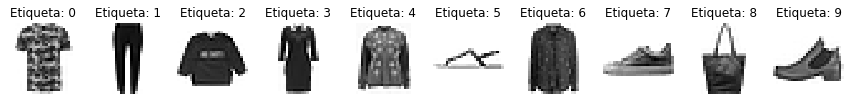

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 15))
for ax, image, label in zip(axes, X_u, y_u):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Etiqueta: %i' % label)

### **Modelo de Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5, random_state=0, n_jobs=5)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 76.76
Precisión sobre los datos de test: 76.17


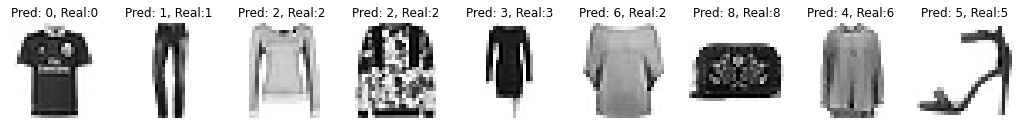

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 18))
for ax, image, prediction, real in zip(axes, X_test, pred_test, y_test):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, Real:{real}')

### **Evaluación del modelo**

In [ ]:
from sklearn import metrics

In [ ]:
print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, pred_test)}\n")

Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.99      0.87      0.92      1000
           2       0.62      0.73      0.67      1000
           3       0.64      0.90      0.75      1000
           4       0.53      0.75      0.62      1000
           5       0.96      0.83      0.89      1000
           6       0.65      0.04      0.08  

Confusion matrix:



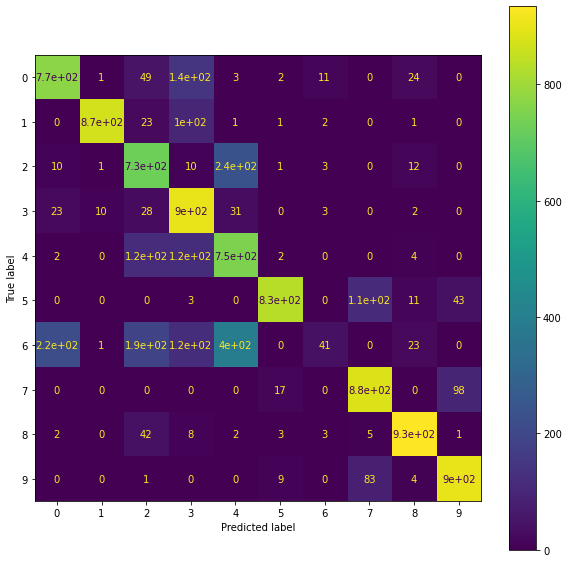

In [ ]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

### **Optimización del modelo**

In [ ]:
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,30,4)):
  rf_model = RandomForestClassifier(random_state=0, max_depth=maxdepth, n_jobs=5)
  rf_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*rf_model.score(X_train, y_train))
  score_test_list.append(100.0*rf_model.score(X_test, y_test))

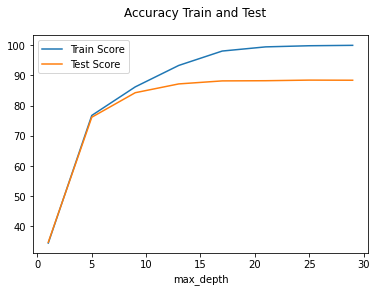

In [ ]:
df = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df.set_index("max_depth", inplace=True)
df["score_train"].plot(label="Train Score")
df["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();

In [ ]:
rf_model_15 = RandomForestClassifier(max_depth=15, random_state=0, n_jobs=5)
rf_model_15.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred_train = rf_model_15.predict(X_train)
pred_test = rf_model_15.predict(X_test)
print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model_15.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model_15.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 96.40
Precisión sobre los datos de test: 87.61


Confusion matrix:



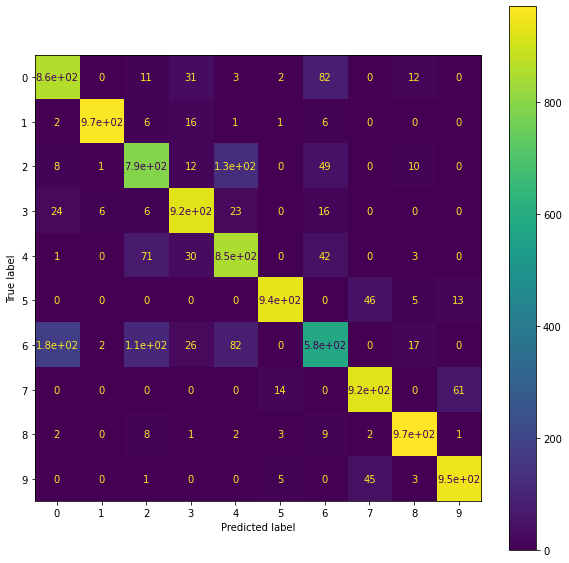

In [ ]:
print(f"Confusion matrix:\n")
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(rf_model_15, X_test, y_test, cmap=plt.cm.viridis, ax=ax)
plt.show()

### **Precision y Recall**

In [ ]:
true_positives_4 = 850
false_positives_4 = 237
false_negatives_4 = 147

Recall = 100.0*true_positives_4/(false_negatives_4+true_positives_4)
Precision = 100.0*true_positives_4/(false_positives_4+true_positives_4)

print (round(Precision,2), round(Recall,2))

78.2 85.26


In [ ]:
sdefrgc 56482

In [ ]:
print(f"Classification report for classifier {rf_model_15}:\n"
      f"{metrics.classification_report(y_test, pred_test)}\n")

Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.89      0.93      0.91      1000
           4       0.78      0.85      0.82      1000
           5       0.97      0.94      0.95      1000
           6       0.74      0.58      0.65 